In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-17 18:14:31.670679


# Matplotlib 3 - histogrammi

Tämä on jatkoa sarjan kahdelle edelliselle osalle:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Lukumäärät

Histogrammia käytetään määrällisen muuttujan luokitellun jakauman esittämiseen. Histogrammissa pylväät ovat kiinni toisissaan. Voin erottaa pylväät toisistaan reunaviivalla (esimerkiksi valkoinen reunaviiva: **edgecolor = 'white'**).

Seuraavassa jaan iät kuuteen ikäluokkaan (**bins=6**).

Text(0.5, 0, 'Ikä')

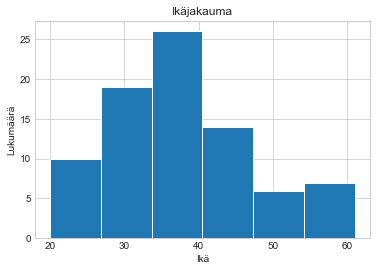

In [4]:
df['ikä'].plot.hist(bins=6, edgecolor='white')

plt.title('Ikäjakauma')
plt.ylabel('Lukumäärä')
plt.xlabel('Ikä')

Edellä määritin luokkien lukumäärän. Tällöin pandas tekee tasavälisen luokittelun ja tarkkoja luokkarajoja ei voi suoraan kaaviosta päätellä. Tämän vuoksi kannattaa yleensä itse määritellä luokkarajat.

Seuraavassa määritän itse palkalle luokkarajat. Luokkien alarajat sisältyvät luokkaan. Luokkien ylärajat eivät sisälly luokkaan paitsi viimeisen luokan kohdalla. Näin ensimmäinen luokka on [1500, 2000) ja viimeinen luokka [5000, 6500].

Huomaa, että pylvään leveys riippuu luokan leveydestä.

([<matplotlib.axis.XTick at 0x20fbe009700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

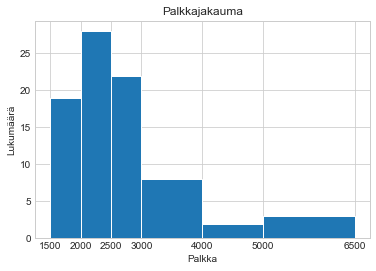

In [5]:
# Määritän luokkarajat
rajat = [1500, 2000, 2500, 3000, 4000, 5000, 6500]

ax1 = df['palkka'].plot.hist(bins=rajat, edgecolor='white')

plt.title('Palkkajakauma')
plt.ylabel('Lukumäärä')
plt.xlabel('Palkka')

# Pystysuuntainen taustaviivoitus kulkee luokkarajojen kohdalla, jos määritän xtickseiksi luokkarajat
plt.xticks(rajat)

## Prosentit

Seuraavassa samat jakauma, mutta esitän lukumäärien sijasta prosentit, joiden laskemiseen käytän **np.ones()**-kikkaa:

* Annan arvoille painokertoimet **weights**-lisäparametrina
* **np.ones(n)** tuottaa alkuperäisten arvojen sijasta pelkkiä ykkösiä. Kun ykkösen suuruisia arvoja summataan käyttäen painokertoimina 1/n, niin saadaan prosentteja
* Kertomalla sadalla saan desimaalimuotoiset prosentit prosenttilukuina

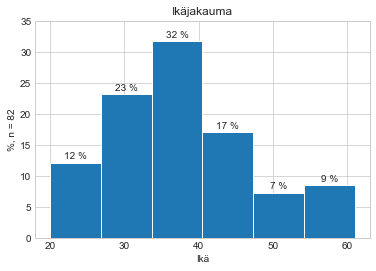

In [6]:
n = df['ikä'].count()

df['ikä'].plot.hist(bins=6, weights=np.ones(n)/n*100, edgecolor='white')

plt.title('Ikäjakauma')
plt.ylabel(f'%, n = {n}')
plt.xlabel('Ikä')
plt.ylim(0, 35)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y+0.3, f'{y:.0f} %', va='bottom', ha='center')

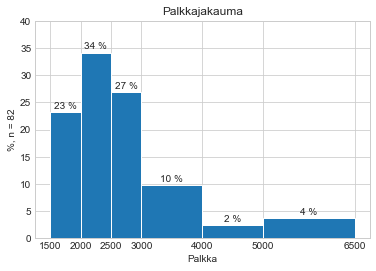

In [7]:
n = df['palkka'].count()

ax3 = df['palkka'].plot.hist(bins=rajat, weights=np.ones(n)/n*100, edgecolor='white')

plt.title('Palkkajakauma')
plt.ylabel(f'%, n = {n}')
plt.xlabel('Palkka')
plt.xticks(rajat)
plt.ylim(0, 40)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y+0.3, f'{y:.0f} %', va='bottom', ha='center')

## Lisätietoa

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb käsittelee värien ja värikarttojen käyttöä